# Lab 2

- Statistical summary of data
- Correlation of data
- Deal with categorical data
- Deal with missing data
- Normalise data

# Imports 

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Data setup

Link to data: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

In [207]:
data_math = pd.read_csv(r"./Data/student-mat.csv")
data_port = pd.read_csv(r"./Data/student-por.csv")

In [208]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [209]:
data_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [210]:
df = pd.concat([data_math, data_port], axis=0)

In [211]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### To be decided by group

In [212]:
#combine the G scores?

df["score"] = (df["G1"] + df["G2"] + df["G3"]) / 3
df.drop(["G1","G2","G3"], axis = 1, inplace = True)

In [213]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10.333333
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,15.333333
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,10.666667
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10.000000


# Statistical Summary and Correlation

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1044 non-null   int64  
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null   

In [215]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,score
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.267241
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,3.218805
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.333333
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.333333


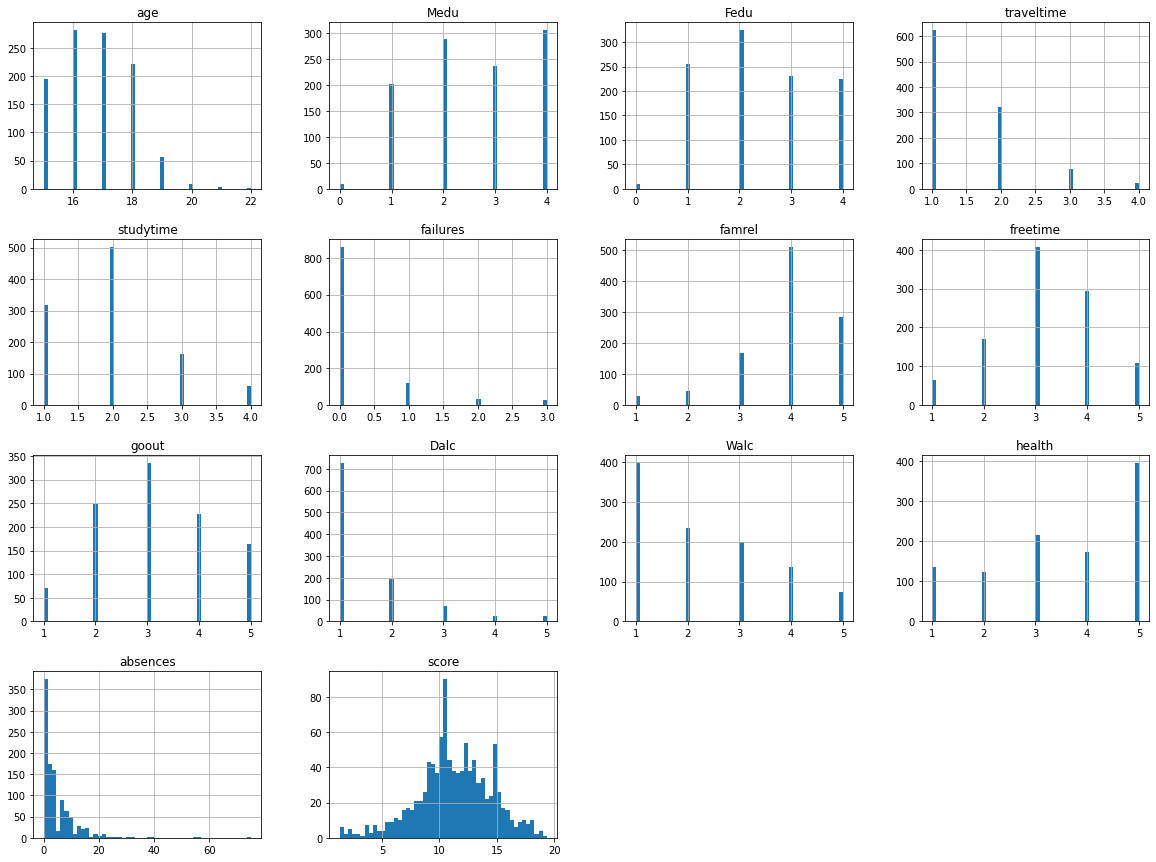

In [216]:
df.hist(bins=50, figsize=(20,15))
plt.show()

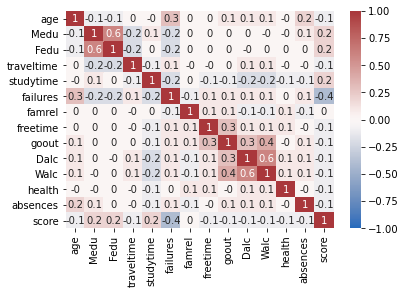

In [217]:
corr_matrix = df.corr().round(1)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [218]:
print(df.corr()["score"].sort_values(ascending = False))

score         1.000000
Medu          0.226919
studytime     0.192288
Fedu          0.186610
famrel        0.047518
freetime     -0.065489
absences     -0.077224
health       -0.080672
goout        -0.107309
traveltime   -0.126157
age          -0.129135
Walc         -0.133902
Dalc         -0.143283
failures     -0.397262
Name: score, dtype: float64


# No missing data

# Categorical data

In [219]:
from sklearn.preprocessing import OneHotEncoder

#### Label encoding

In [220]:
le = preprocessing.LabelEncoder()

df["school"] = le.fit_transform(df["school"])
df["sex"] = le.fit_transform(df["sex"])
df["address"] = le.fit_transform(df["address"])
df["famsize"] = le.fit_transform(df["famsize"])
df["Pstatus"] = le.fit_transform(df["Pstatus"])
df["schoolsup"] = le.fit_transform(df["schoolsup"])
df["famsup"] = le.fit_transform(df["famsup"])
df["paid"] = le.fit_transform(df["paid"])
df["activities"] = le.fit_transform(df["activities"])
df["nursery"] = le.fit_transform(df["nursery"])
df["higher"] = le.fit_transform(df["higher"])
df["internet"] = le.fit_transform(df["internet"])
df["romantic"] = le.fit_transform(df["romantic"])

# TODO: encode columns 10,11,12 

#### One Hot Encoding 

In [223]:
OHE = OneHotEncoder(drop = "first", sparse=False)
ohe_mjob = OHE.fit_transform(np.array(df["Mjob"]).reshape(-1,1))

df["Mjob_health"] = ohe_mjob[:,0] 
df["Mjob_other"] = ohe_mjob[:,1] 
df["Mjob_services"] = ohe_mjob[:,2] 
df["Mjob_teacher"] = ohe_mjob[:,3] 

df.drop(["Mjob"], axis = 1, inplace = True)

In [227]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,...,goout,Dalc,Walc,health,absences,score,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,0,0,18,1,0,0,4,4,teacher,course,...,4,1,1,3,6,5.666667,0.0,0.0,0.0,0.0
1,0,0,17,1,0,1,1,1,other,course,...,3,1,1,3,4,5.333333,0.0,0.0,0.0,0.0
2,0,0,15,1,1,1,1,1,other,other,...,2,2,3,3,10,8.333333,0.0,0.0,0.0,0.0
3,0,0,15,1,0,1,4,2,services,home,...,2,1,1,5,2,14.666667,1.0,0.0,0.0,0.0
4,0,0,16,1,0,1,3,3,other,home,...,2,1,2,5,4,8.666667,0.0,1.0,0.0,0.0


In [228]:
df.iloc[0]

school                 0
sex                    0
age                   18
address                1
famsize                0
Pstatus                0
Medu                   4
Fedu                   4
Fjob             teacher
reason            course
guardian          mother
traveltime             2
studytime              2
failures               0
schoolsup              1
famsup                 0
paid                   0
activities             0
nursery                1
higher                 1
internet               0
romantic               0
famrel                 4
freetime               3
goout                  4
Dalc                   1
Walc                   1
health                 3
absences               6
score            5.66667
Mjob_health            0
Mjob_other             0
Mjob_services          0
Mjob_teacher           0
Name: 0, dtype: object

# Min-Max Scaling

In [61]:
#categorical features need to be converted first
#X_scaled = (X - np.amin(X)) / (np.amax(X) - np.amin(X))
#X_scaled